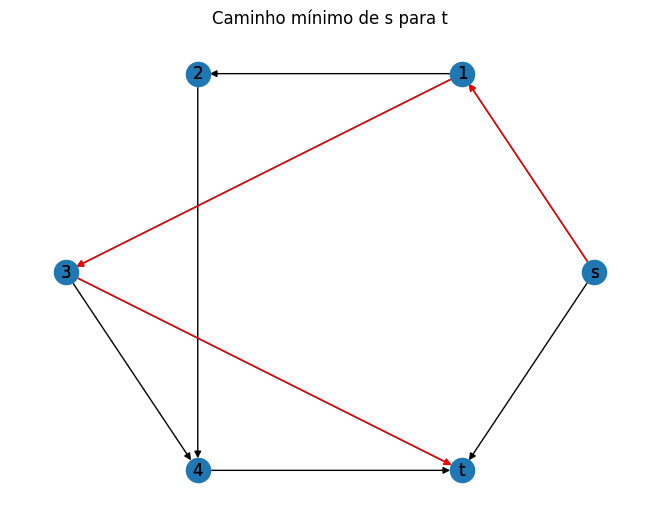

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def a_star(graph, start, end):
    open_list = [(0, start)]
    closed_set = set()
    g_score = {vertex: float('inf') for vertex in graph.nodes}
    g_score[start] = 0
    f_score = {vertex: float('inf') for vertex in graph.nodes}
    f_score[start] = heuristic(start, end)

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            path = reconstruct_path(came_from, current)
            return path

        closed_set.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor in closed_set:
                continue

            edge_weight = graph[current][neighbor]['weight']
            tentative_g_score = g_score[current] + edge_weight

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, end)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def heuristic(node, end):
    # Neste exemplo, usaremos uma heurística simples - a distância euclidiana
    return 0  # Você pode implementar uma heurística mais sofisticada aqui

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# Criando o grafo
G = nx.DiGraph()

G.add_edge('s', 1, weight=1)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=1)
G.add_edge(2, 4, weight=5)
G.add_edge(3, 4, weight=3)
G.add_edge(3, 't', weight=4)
G.add_edge(4, 't', weight=2)
G.add_edge('s', 't', weight=10)

# Encontrando o caminho mínimo
came_from = {}
path = a_star(G, 's', 't')

if path:
    # Plotando o grafo
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')

    # Destacando o caminho mínimo em vermelho
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    edge_colors = ['red' for edge in G.edges]
    nx.draw(G, pos, edgelist=path_edges, edge_color=edge_colors, with_labels=True)

    # Definindo o título
    plt.title('Caminho mínimo de s para t')

    # Exibindo o gráfico
    plt.show()
else:
    print("Caminho não encontrado")